# Training Interface

## Example

In [1]:
from experiment.Experiment import Experiment
from experiment.ExperimentSet import ExperimentSet
from utils.read import read_UCR_dataset_name

from sktime.classification.kernel_based import RocketClassifier

### Experiment Class

In [2]:
# BASELINE
variation = 'minirocket'
clasifier = {'name':variation, 'function': RocketClassifier(rocket_transform=variation)}
dataset = 'Adiac'
training_one = Experiment(clasifier=clasifier, dataset=dataset, save_result=False)
training_one.run_all()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


minirocket, Adiac, (None, None), (None, None), 0.8158567774936062 DONE


In [3]:
# AUGMENTED
from time_series_augmentation.utils.augmentation import jitter

variation = 'minirocket'
classifer = {'name':variation, 'function': RocketClassifier(rocket_transform=variation)}
dataset = 'Adiac'
augment = {'name':jitter.__name__, 'function': jitter, 'params': {'sigma': 0.05}}
training_two = Experiment(clasifier=clasifier, dataset=dataset, augment=augment, save_result=False)
training_two.run_all()

minirocket, Adiac, (None, None), (jitter, {'sigma': 0.05}), 0.5421994884910486 DONE


/Users/pongpanod.san.adm/miniconda3/envs/thesis3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Experiment Set

In [5]:
# BASELINE
variation = 'minirocket'
classifier = {'name':variation, 'function': RocketClassifier(rocket_transform=variation)}
datasets = read_UCR_dataset_name()
experiment_set = ExperimentSet(classifier=classifier, datasets=datasets, save_result=False)
experiment_set.run_all()

TypeError: string indices must be integers

In [9]:
# AUGMENTED
from time_series_augmentation.utils.augmentation import jitter

variation = 'minirocket'
classifier = {'name':variation, 'function': RocketClassifier(rocket_transform=variation)}
datasets = read_UCR_dataset_name()[:2]
# augments = {'name':jitter.__name__, 'function': jitter, 'params': {'sigma': 0.05}}
augments = {
    "name": jitter.__name__,
    "function": jitter,
    "concat_original": True,
    "enter_label": False,
    "params": {"sigma": [0.9]},
}
experiment_set = ExperimentSet(classifier=classifier, datasets=datasets, augments=augments, save_result=False)
experiment_set.run_all()

minirocket, BeetleFly, (None, None), (jitter, {'sigma': 0.9}), 0.85 DONE
minirocket, CinCECGTorso, (None, None), (jitter, {'sigma': 0.9}), 0.731159420289855 DONE


## Experiment

In [1]:
import warnings
warnings.filterwarnings("ignore")

from experiment.Experiment import Experiment
from experiment.ExperimentSet import ExperimentSet
from utils.read import read_UCR_dataset_name

from sktime.classification.kernel_based import RocketClassifier

In [2]:
from time_series_augmentation.utils import augmentation as aug

variation = "minirocket"
classifier = {
    "name": variation,
    "function": RocketClassifier(rocket_transform=variation),
}
datasets = read_UCR_dataset_name(mySelection=0.0, bakeoff=True)
preprocess = {"name":None}
augments = {
    "name": aug.discriminative_guided_warp.__name__,
    "function": aug.discriminative_guided_warp,
    "concat_original": False,
    "enter_label": True,
    "params": {"batch_size": [5, 6]},
}

experiment_set = ExperimentSet(
    classifier=classifier, datasets=datasets, preprocess=preprocess, augments=augments, save_result=True, save_data=True
)
experiment_set.run_all()

100%|██████████| 391/391 [00:17<00:00, 22.24it/s]
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


minirocket, Adiac, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.4936061381074169 DONE


100%|██████████| 175/175 [00:14<00:00, 11.73it/s]


minirocket, ArrowHead, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.7542857142857143 DONE


100%|██████████| 30/30 [00:08<00:00,  3.60it/s]


minirocket, Beef, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.7 DONE


100%|██████████| 20/20 [00:06<00:00,  3.01it/s]


minirocket, BeetleFly, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 1.0 DONE


100%|██████████| 20/20 [00:06<00:00,  3.00it/s]


minirocket, BirdChicken, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.85 DONE


100%|██████████| 60/60 [00:25<00:00,  2.37it/s]


minirocket, Car, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.7333333333333333 DONE


100%|██████████| 900/900 [00:23<00:00, 38.48it/s]


minirocket, CBF, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.9655555555555555 DONE


100%|██████████| 3840/3840 [02:39<00:00, 24.13it/s]


minirocket, ChlorineConcentration, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.528125 DONE


100%|██████████| 1380/1380 [1:14:58<00:00,  3.26s/it]


minirocket, CinCECGTorso, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.7065217391304348 DONE


100%|██████████| 28/28 [00:03<00:00,  9.15it/s]


minirocket, Coffee, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 1.0 DONE


100%|██████████| 250/250 [02:41<00:00,  1.55it/s]


minirocket, Computers, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.732 DONE


100%|██████████| 390/390 [00:46<00:00,  8.43it/s]


minirocket, CricketX, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.7307692307692307 DONE


100%|██████████| 390/390 [00:45<00:00,  8.53it/s]


minirocket, CricketY, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.7051282051282052 DONE


100%|██████████| 390/390 [00:45<00:00,  8.54it/s]


minirocket, CricketZ, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.7333333333333333 DONE


100%|██████████| 306/306 [00:47<00:00,  6.43it/s]


minirocket, DiatomSizeReduction, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.7973856209150327 DONE


100%|██████████| 139/139 [00:01<00:00, 84.49it/s]


minirocket, DistalPhalanxOutlineAgeGroup, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.9064748201438849 DONE


100%|██████████| 276/276 [00:03<00:00, 84.06it/s]


minirocket, DistalPhalanxOutlineCorrect, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.7391304347826086 DONE


100%|██████████| 139/139 [00:01<00:00, 83.23it/s]


minirocket, DistalPhalanxTW, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.6762589928057554 DONE


100%|██████████| 139/139 [00:46<00:00,  3.02it/s]


minirocket, Earthquakes, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.7482014388489209 DONE


100%|██████████| 100/100 [00:01<00:00, 61.26it/s]


minirocket, ECG200, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.86 DONE


100%|██████████| 4500/4500 [02:14<00:00, 33.41it/s]


minirocket, ECG5000, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.9435555555555556 DONE


100%|██████████| 861/861 [00:24<00:00, 34.76it/s]


minirocket, ECGFiveDays, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.8420441347270615 DONE


100%|██████████| 7711/7711 [02:05<00:00, 61.61it/s]


minirocket, ElectricDevices, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.6670989495525872 DONE


100%|██████████| 1690/1690 [00:47<00:00, 35.70it/s]


minirocket, FaceAll, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.8218934911242604 DONE


100%|██████████| 88/88 [00:13<00:00,  6.35it/s]


minirocket, FaceFour, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.8636363636363636 DONE


100%|██████████| 2050/2050 [00:57<00:00, 35.68it/s]


minirocket, FacesUCR, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.8492682926829268 DONE


100%|██████████| 455/455 [00:42<00:00, 10.83it/s]


minirocket, FiftyWords, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.7098901098901099 DONE


100%|██████████| 175/175 [00:47<00:00,  3.65it/s]


minirocket, Fish, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.8 DONE


100%|██████████| 1320/1320 [06:57<00:00,  3.16it/s]


minirocket, FordA, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.8295454545454546 DONE


100%|██████████| 810/810 [04:23<00:00,  3.07it/s]


minirocket, FordB, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.7135802469135802 DONE


100%|██████████| 150/150 [00:06<00:00, 24.80it/s]


minirocket, GunPoint, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.92 DONE


100%|██████████| 105/105 [00:28<00:00,  3.73it/s]


minirocket, Ham, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.8380952380952381 DONE


100%|██████████| 370/370 [54:11<00:00,  8.79s/it]


minirocket, HandOutlines, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.8756756756756757 DONE


100%|██████████| 308/308 [07:26<00:00,  1.45s/it]


minirocket, Haptics, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.39935064935064934 DONE


100%|██████████| 64/64 [00:21<00:00,  3.02it/s]


minirocket, Herring, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.6875 DONE


100%|██████████| 550/550 [39:27<00:00,  4.30s/it]


minirocket, InlineSkate, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.34 DONE


100%|██████████| 1980/1980 [02:52<00:00, 11.48it/s]


minirocket, InsectWingbeatSound, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.554040404040404 DONE


100%|██████████| 1029/1029 [00:02<00:00, 445.05it/s]


minirocket, ItalyPowerDemand, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.9358600583090378 DONE


100%|██████████| 375/375 [03:58<00:00,  1.57it/s]


minirocket, LargeKitchenAppliances, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.88 DONE


100%|██████████| 61/61 [00:30<00:00,  1.98it/s]


minirocket, Lightning2, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.6557377049180327 DONE


100%|██████████| 73/73 [00:09<00:00,  7.54it/s]


minirocket, Lightning7, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.7534246575342466 DONE


100%|██████████| 2345/2345 [49:49<00:00,  1.27s/it]


minirocket, Mallat, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.7718550106609808 DONE


100%|██████████| 60/60 [00:15<00:00,  3.93it/s]


minirocket, Meat, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.9833333333333333 DONE


100%|██████████| 760/760 [00:12<00:00, 59.68it/s]


minirocket, MedicalImages, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.7276315789473684 DONE


100%|██████████| 154/154 [00:01<00:00, 84.30it/s]


minirocket, MiddlePhalanxOutlineAgeGroup, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.6818181818181818 DONE


100%|██████████| 291/291 [00:03<00:00, 84.40it/s]


minirocket, MiddlePhalanxOutlineCorrect, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.7594501718213058 DONE


100%|██████████| 154/154 [00:01<00:00, 84.11it/s]


minirocket, MiddlePhalanxTW, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.6298701298701299 DONE


100%|██████████| 1252/1252 [00:16<00:00, 75.09it/s]


minirocket, MoteStrain, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.9033546325878594 DONE


100%|██████████| 1965/1965 [22:47<00:00,  1.44it/s]


minirocket, NonInvasiveFetalECGThorax1, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.7190839694656489 DONE


100%|██████████| 1965/1965 [22:56<00:00,  1.43it/s]


minirocket, NonInvasiveFetalECGThorax2, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.7862595419847328 DONE


100%|██████████| 30/30 [00:12<00:00,  2.46it/s]


minirocket, OliveOil, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.7666666666666667 DONE


100%|██████████| 242/242 [00:56<00:00,  4.32it/s]


minirocket, OSULeaf, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.8553719008264463 DONE


100%|██████████| 858/858 [00:10<00:00, 82.89it/s]


minirocket, PhalangesOutlinesCorrect, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.7365967365967366 DONE


100%|██████████| 1896/1896 [40:26<00:00,  1.28s/it]


minirocket, Phoneme, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.28639240506329117 DONE


100%|██████████| 105/105 [00:03<00:00, 30.85it/s]


minirocket, Plane, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.9619047619047619 DONE


100%|██████████| 205/205 [00:02<00:00, 84.21it/s]


minirocket, ProximalPhalanxOutlineAgeGroup, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.9463414634146341 DONE


100%|██████████| 291/291 [00:03<00:00, 82.23it/s]


minirocket, ProximalPhalanxOutlineCorrect, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.9175257731958762 DONE


100%|██████████| 205/205 [00:02<00:00, 84.60it/s]


minirocket, ProximalPhalanxTW, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.7609756097560976 DONE


100%|██████████| 375/375 [04:00<00:00,  1.56it/s]


minirocket, RefrigerationDevices, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.4746666666666667 DONE


100%|██████████| 375/375 [04:00<00:00,  1.56it/s]


minirocket, ScreenType, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.5013333333333333 DONE


100%|██████████| 180/180 [00:57<00:00,  3.15it/s]


minirocket, ShapeletSim, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.9777777777777777 DONE


100%|██████████| 600/600 [03:19<00:00,  3.01it/s]


minirocket, ShapesAll, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.8683333333333333 DONE


100%|██████████| 375/375 [03:59<00:00,  1.56it/s]


minirocket, SmallKitchenAppliances, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.88 DONE


100%|██████████| 601/601 [00:05<00:00, 103.17it/s]


minirocket, SonyAIBORobotSurface1, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.7221297836938436 DONE


100%|██████████| 953/953 [00:08<00:00, 112.62it/s]


minirocket, SonyAIBORobotSurface2, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.8614900314795383 DONE


100%|██████████| 8236/8236 [2:55:04<00:00,  1.28s/it]  


minirocket, StarLightCurves, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.978630403108305 DONE


100%|██████████| 370/370 [00:28<00:00, 13.17it/s]


minirocket, Strawberry, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.972972972972973 DONE


100%|██████████| 625/625 [00:16<00:00, 38.71it/s]


minirocket, SwedishLeaf, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.8256 DONE


100%|██████████| 995/995 [03:20<00:00,  4.97it/s]


minirocket, Symbols, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.9587939698492463 DONE


100%|██████████| 300/300 [00:02<00:00, 130.64it/s]


minirocket, SyntheticControl, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.9866666666666667 DONE


100%|██████████| 228/228 [00:23<00:00,  9.73it/s]


minirocket, ToeSegmentation1, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.9298245614035088 DONE


100%|██████████| 130/130 [00:20<00:00,  6.48it/s]


minirocket, ToeSegmentation2, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.9 DONE


100%|██████████| 100/100 [00:10<00:00,  9.84it/s]


minirocket, Trace, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 1.0 DONE


100%|██████████| 1139/1139 [00:14<00:00, 77.35it/s]


minirocket, TwoLeadECG, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.9675153643546971 DONE


100%|██████████| 4000/4000 [01:42<00:00, 38.85it/s]


minirocket, TwoPatterns, (None, None), (discriminative_guided_warp, {'batch_size': 5}), 0.9655 DONE


 19%|█▊        | 669/3582 [12:31<56:05,  1.16s/it]  

In [2]:
from time_series_augmentation.utils import augmentation as aug

variation = "minirocket"
classifier = {
    "name": variation,
    "function": RocketClassifier(rocket_transform=variation),
}
datasets = read_UCR_dataset_name(mySelection=0.0, bakeoff=True)
preprocess = {"name":None}
augments = {
    "name": aug.discriminative_guided_warp.__name__,
    "function": aug.discriminative_guided_warp,
    "concat_original": False,
    "enter_label": True,
    "params": {"batch_size": [7]},
}

experiment_set = ExperimentSet(
    classifier=classifier, datasets=datasets, preprocess=preprocess, augments=augments, save_result=True, save_data=True
)
experiment_set.run_all()

100%|██████████| 391/391 [00:34<00:00, 11.20it/s]
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


minirocket, Adiac, (None, None), (discriminative_guided_warp, {'batch_size': 7}), 0.47570332480818417 DONE


100%|██████████| 175/175 [00:29<00:00,  5.85it/s]


minirocket, ArrowHead, (None, None), (discriminative_guided_warp, {'batch_size': 7}), 0.7314285714285714 DONE


100%|██████████| 30/30 [00:16<00:00,  1.79it/s]


minirocket, Beef, (None, None), (discriminative_guided_warp, {'batch_size': 7}), 0.7333333333333333 DONE


100%|██████████| 20/20 [00:13<00:00,  1.46it/s]


minirocket, BeetleFly, (None, None), (discriminative_guided_warp, {'batch_size': 7}), 0.8 DONE


100%|██████████| 20/20 [00:13<00:00,  1.49it/s]


minirocket, BirdChicken, (None, None), (discriminative_guided_warp, {'batch_size': 7}), 0.95 DONE


100%|██████████| 60/60 [00:49<00:00,  1.22it/s]


minirocket, Car, (None, None), (discriminative_guided_warp, {'batch_size': 7}), 0.75 DONE


100%|██████████| 900/900 [00:44<00:00, 20.18it/s]


minirocket, CBF, (None, None), (discriminative_guided_warp, {'batch_size': 7}), 0.9733333333333334 DONE


100%|██████████| 3840/3840 [05:03<00:00, 12.67it/s]


minirocket, ChlorineConcentration, (None, None), (discriminative_guided_warp, {'batch_size': 7}), 0.5278645833333333 DONE


100%|██████████| 1380/1380 [2:25:57<00:00,  6.35s/it] 


minirocket, CinCECGTorso, (None, None), (discriminative_guided_warp, {'batch_size': 7}), 0.7079710144927536 DONE


100%|██████████| 28/28 [00:05<00:00,  4.80it/s]


minirocket, Coffee, (None, None), (discriminative_guided_warp, {'batch_size': 7}), 1.0 DONE


100%|██████████| 250/250 [05:10<00:00,  1.24s/it]


minirocket, Computers, (None, None), (discriminative_guided_warp, {'batch_size': 7}), 0.764 DONE


100%|██████████| 390/390 [01:30<00:00,  4.29it/s]


minirocket, CricketX, (None, None), (discriminative_guided_warp, {'batch_size': 7}), 0.7102564102564103 DONE


100%|██████████| 390/390 [01:30<00:00,  4.33it/s]


minirocket, CricketY, (None, None), (discriminative_guided_warp, {'batch_size': 7}), 0.7051282051282052 DONE


100%|██████████| 390/390 [01:35<00:00,  4.08it/s]


minirocket, CricketZ, (None, None), (discriminative_guided_warp, {'batch_size': 7}), 0.7333333333333333 DONE


100%|██████████| 306/306 [01:33<00:00,  3.26it/s]


minirocket, DiatomSizeReduction, (None, None), (discriminative_guided_warp, {'batch_size': 7}), 0.7320261437908496 DONE


100%|██████████| 139/139 [00:03<00:00, 41.65it/s]


minirocket, DistalPhalanxOutlineAgeGroup, (None, None), (discriminative_guided_warp, {'batch_size': 7}), 0.920863309352518 DONE


100%|██████████| 276/276 [00:06<00:00, 41.55it/s]


minirocket, DistalPhalanxOutlineCorrect, (None, None), (discriminative_guided_warp, {'batch_size': 7}), 0.7717391304347826 DONE


100%|██████████| 139/139 [00:03<00:00, 42.68it/s]


minirocket, DistalPhalanxTW, (None, None), (discriminative_guided_warp, {'batch_size': 7}), 0.6906474820143885 DONE


100%|██████████| 139/139 [01:33<00:00,  1.48it/s]


minirocket, Earthquakes, (None, None), (discriminative_guided_warp, {'batch_size': 7}), 0.7266187050359713 DONE


100%|██████████| 100/100 [00:03<00:00, 31.38it/s]


minirocket, ECG200, (None, None), (discriminative_guided_warp, {'batch_size': 7}), 0.89 DONE


100%|██████████| 4500/4500 [04:24<00:00, 16.99it/s]


minirocket, ECG5000, (None, None), (discriminative_guided_warp, {'batch_size': 7}), 0.9408888888888889 DONE


100%|██████████| 861/861 [00:48<00:00, 17.65it/s]


minirocket, ECGFiveDays, (None, None), (discriminative_guided_warp, {'batch_size': 7}), 0.867595818815331 DONE


 80%|███████▉  | 6145/7711 [03:19<00:51, 30.67it/s]

----------

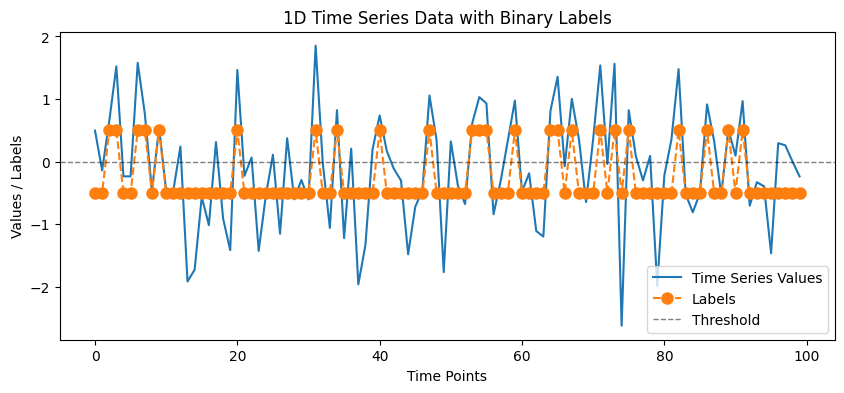

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Number of time points
num_time_points = 100

# Create a synthetic 1D time series
time_series_values = np.random.randn(num_time_points)

# Set a threshold to determine binary labels
threshold = 0.5

# Create labels (binary classification) based on the threshold
time_series_labels = (time_series_values > threshold).astype(int)

# Display the time series and labels
plt.figure(figsize=(10, 4))
plt.plot(time_series_values, label='Time Series Values')
# plt.plot(time_series_labels - 0.5, label='Labels', linestyle='--', marker='o', markersize=8)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5, label='Threshold')
plt.title('1D Time Series Data with Binary Labels')
plt.xlabel('Time Points')
plt.ylabel('Values / Labels')
plt.legend()
plt.show()


In [5]:
time_series_values

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

In [14]:
time_series_values = time_series_values.reshape(1, -1)
time_series_labels = time_series_labels.reshape(1, -1)

In [15]:
time_series_labels.shape

(1, 100)

In [2]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 5.3 MB/s eta 0:00:0000:01
